# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline
from scipy.stats import uniform

import numpy.polynomial.polynomial as poly
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import minmax_scale

# Generate data, and split the data into train and test sets
For the first portion of this assignment, a data set of 20 random points where X is generated using uniform distribution from 0, 1, and Y is generated using this formula: y = sin(2*pi*X) + 0.1 * N 
N is sampled from the normal Gaussian distribution, and multiplied by 0.1 to increase randomness. (This value can also be changed based on your model, but 0.1 worked best in my case). These points are then sorted to be displayed. 

To obtain train and test data from these 20 X and Y points, the train_test_split module is used to split the data set in half randomly (rather than just taking the first half and second half of this data).

In [3]:
def generate(X):
    return np.sin(2 * np.pi * X) + np.random.normal(0, 1) * 0.1

X_data = []
X_data = np.random.uniform(0, 1, 20)
X_data.sort()

Y_data = []
for X in X_data:
    y = generate(X) 
    Y_data.append(y)

np.random.seed(0)
degrees = [1, 3, 9]

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.5, random_state=42)

# Fit the models to each degree [0, 1, 3, 9]

From here, begin fitting the models using polynomial features to implement the degrees, and linear regression as the model. Polynomial features is used to generate features to the degree specified in the declaration function.

Pipeline is used to implement steps, or transformations, then the model is fit using the pipeline rather than manually transforming at each step. The training data is then fit to this pipeline, and two new variables are declared to generate more points along the fit and model line to make them smoother when plotting the graphs. These are used to plot the model and the true function (the function used to generate values). The samples from the training set are then plotted. 

## Save the weights of each model of each degree

To get the weights for each model, the coefficient call is used to retreive each coefficient in the model. For future display purposes, the resulting numpy array is filled with empty values to the tenth index. This will allow these weight arrays for each degree to be added to a dataframe to be printed, or displayed in a table. 

These steps are then followed for each degree of 0, 1, 3, and 9.
It is important to note that when declaring PolynomialFeatures, include_bias is automatically set to True, so this does not necessarily need to be declared. If this is changed to false, a model with a degree of 0 cannot be fit. 

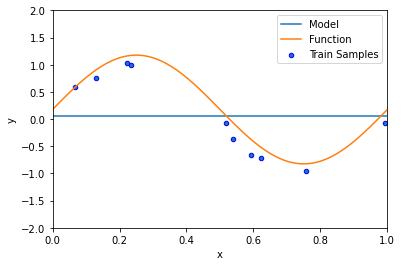

In [4]:
polynomial_features = PolynomialFeatures(degree=0)
linear_regression = LinearRegression()

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])

X_new = np.linspace(0, 1, 100)
X_data = np.linspace(0, 1, 100)

pipeline.fit(X_train.reshape(-1, 1), Y_train)

plt.plot(X_new, pipeline.predict(X_new.reshape(-1, 1)), label="Model")
plt.plot(X_data, generate(X_data), label="Function")
plt.scatter(X_train, Y_train, edgecolor='b', s=20, label="Train Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")

coef = linear_regression.coef_
D0Weights = coef.tolist() + [""]*(10-len(coef))
plt.show()

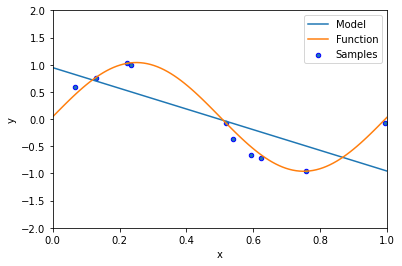

In [5]:
polynomial_features = PolynomialFeatures(degree=1)
linear_regression = LinearRegression()
  
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])

pipeline.fit(X_train.reshape(-1, 1), Y_train)

X_new = np.linspace(0, 1, 100)

plt.plot(X_new, pipeline.predict(X_new.reshape(-1, 1)), label="Model")
plt.plot(X_data, generate(X_data), label="Function")
plt.scatter(X_train, Y_train, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")

coef = linear_regression.coef_
D1Weights = coef.tolist() + [""]*(10-len(coef))

plt.show()

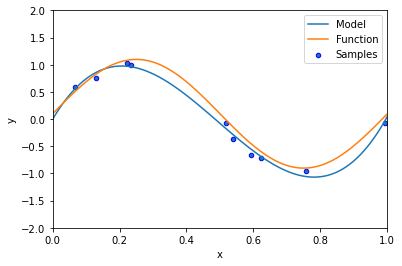

In [6]:
polynomial_features = PolynomialFeatures(degree=3)
linear_regression = LinearRegression()

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])

pipeline.fit(X_train.reshape(-1, 1), Y_train)

X_new = np.linspace(0, 1, 100)

plt.plot(X_new, pipeline.predict(X_new.reshape(-1, 1)), label="Model")
plt.plot(X_new, generate(X_new), label="Function")
plt.scatter(X_train, Y_train, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")

coef = linear_regression.coef_
D3Weights = coef.tolist() + [""]*(10-len(coef))

plt.show()

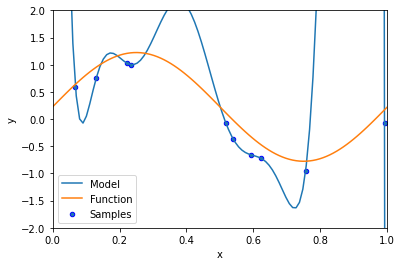

In [7]:
polynomial_features = PolynomialFeatures(degree=9)
linear_regression = LinearRegression()

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])

X_new = np.linspace(0, 1, 100)

pipeline.fit(X_train.reshape(-1, 1), Y_train)

plt.plot(X_new, pipeline.predict(X_new.reshape(-1, 1)), label="Model")
plt.plot(X_data, generate(X_data), label="Function")
plt.scatter(X_train, Y_train, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")

coef = linear_regression.coef_
D9Weights = coef.tolist() + [""]*(10-len(coef))
plt.show()

# Display Weights

The weights that were saved into arrays are now put into a dataframe, into their individual columns. By filling the arrays to index 9 with empty spaces (from the last index in the array to 9), this allows these to be placed into the dataframe and printed. 

  M=0      M=1      M=3           M=9
0   0        0        0  0.000000e+00
1     -1.90539  10.4222 -1.457121e+03
2              -31.9199  2.160219e+04
3                21.552 -1.665602e+05
4                        7.483762e+05
5                       -2.056478e+06
6                        3.493502e+06
7                       -3.572120e+06
8                        2.011029e+06
9                       -4.779629e+05


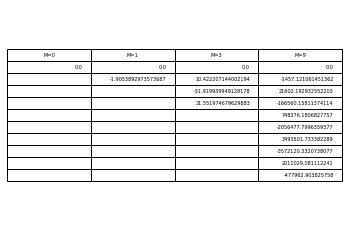

In [8]:
df = pd.DataFrame()
df['M=0'] = D0Weights
df['M=1'] = D1Weights
df['M=3'] = D3Weights
df['M=9'] = D9Weights
print(df) 

table = plt.table(cellText=df.values, colLabels=df.columns, loc="center")
plt.xticks([])
plt.yticks([])
plt.box(on=None)

plt.show()

# Display Train and Test Errors Using Root Mean Squared Error

Next, each degree from 0 to 9 is iterated through and the model fit, and the RMSE is retrieved and appended to a list to be plotted. 

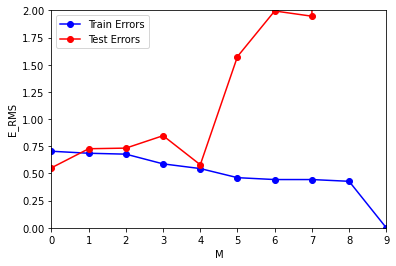

In [9]:
test_errors = []
train_errors = []
degree=[]
for i in range(0, 10):
    polynomial_features = PolynomialFeatures(degree=i)
    linear_regression = LinearRegression()

    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    pipeline.fit(X_train.reshape(-1, 1), Y_train)
    X_train.sort()
    
    train_errors.append(np.sqrt(mean_squared_error(Y_train, pipeline.predict(X_train.reshape(-1,1)))))
    test_errors.append(np.sqrt(mean_squared_error(Y_test, pipeline.predict(X_test.reshape(-1,1)))))

    degree.append(i)

plt.plot(degree, (train_errors), color='b', marker='o', label="Train Errors")
plt.plot(degree, (test_errors), color='r', marker='o', label="Test Errors")
plt.xlabel("M")
plt.ylabel("E_RMS")
plt.xlim((0, 9))
plt.ylim((0, 2))
plt.legend(loc="best")
plt.show()

# Generate 100 More Data Points - fit 9th order model

To do this, the same method is used as was used to generate and fit 10 data points, just now 100 data points are randomly generated.
They are once again split into half for train and test sets, and fit using polynomial features and linear regression at degree 9.  The 100 points are then plotted, as well as the model line, and function line. 

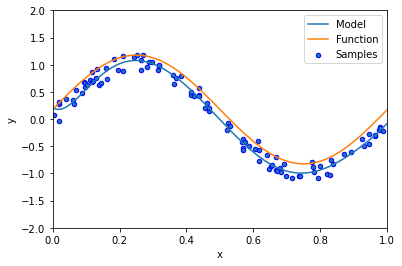

In [10]:

def generate(X):
    return np.sin(2 * np.pi * X)+ np.random.normal(0, 1)*0.1

X_data_100 = []
X_data_100 = np.random.uniform(0, 1, 100)
X_data_100.sort()

Y_data_100 = []
for X in X_data_100:
    y = generate(X)
    Y_data_100.append(y)

np.random.seed(0)

n_samples = 100
degrees = [1, 3, 9]

X_train_100, X_test_100, Y_train_100, Y_test_100 = train_test_split(X_data_100, Y_data_100, test_size=0.5, random_state=42)

polynomial_features = PolynomialFeatures(degree=9)
linear_regression = LinearRegression()

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])

pipeline.fit(X_train_100.reshape(-1, 1), Y_train_100)

X_new_100 = np.linspace(0, 1, 1000)

plt.plot(X_new_100, pipeline.predict(X_new_100.reshape(-1, 1)), label="Model")
plt.plot(X_new_100, generate(X_new_100), label="Function")
plt.scatter(X_data_100, Y_data_100, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.show()

# Plot Train and Test Errors for 9th Order Model

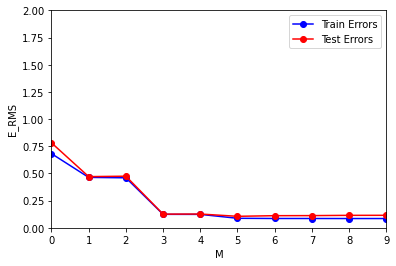

In [11]:
test_errors_100 = []
train_errors_100 = []
degree_100=[]
for i in range(0, 10):
    polynomial_features = PolynomialFeatures(degree=i)
    linear_regression = LinearRegression()

    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    pipeline.fit(X_train_100.reshape(-1, 1), Y_train_100)
    
    train_errors_100.append(np.sqrt(mean_squared_error(Y_train_100, pipeline.predict(X_train_100.reshape(-1,1)))))
    test_errors_100.append(np.sqrt(mean_squared_error(Y_test_100, pipeline.predict(X_test_100.reshape(-1,1)))))

    degree_100.append(i)

plt.plot(degree_100, (train_errors_100), color='b', marker='o', label="Train Errors")
plt.plot(degree_100, (test_errors_100), color='r', marker='o', label="Test Errors")
plt.xlabel("M")
plt.ylabel("E_RMS")
plt.xlim((0, 9))
plt.ylim((0, 2))
plt.legend(loc="best")
plt.show()

# Regularize Using Sum of Weights
## L2 Regularization - Ridge

Ridge regularization (L2 regularization) is used here to prevent overfitting that occurs with linear regression. The biggest challenge I faced was learning how to fit the model with Ridge Regularization, as many documentations and tutorials online did not use pipeline, rather, they manually implemented the transformation steps. To do so with pipeline, rather than including linear regression as a pipeline step, ridge is actually included here. This way the model can then be fit with Ridge regularization, on the original 10 data points. 

To use ridge regularization, an alpha value (lambda) must be used. An array of values between 0 and 1 are used, and these are iterated through and used in the model. Depending on the data - as it is randomized - a lambda value of 0.1 or 0.01 seem to give the least error, although a lambda of 0.00001 seems to give the best fit. 

## Plot train and test error for each value of lambda

Training error:
0.6472936325462046

Testing error:
0.6960824356771956


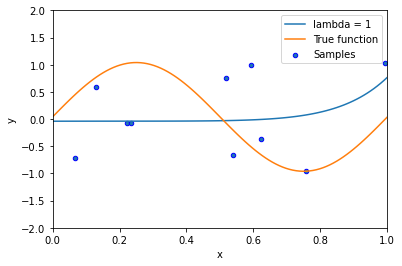

Training error:
0.618023147930625

Testing error:
0.6299996533892768


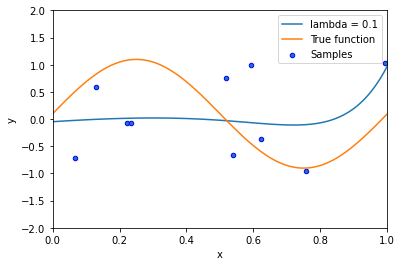

Training error:
0.5491117346475556

Testing error:
0.5344618427810416


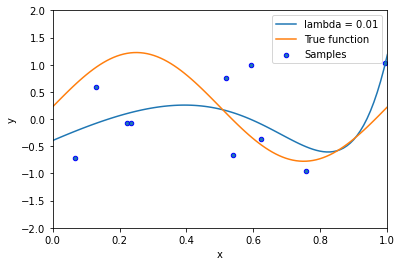

Training error:
0.5274890898302803

Testing error:
0.5887863065467426


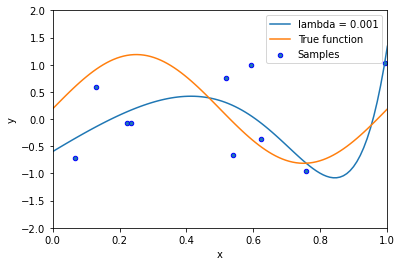

Training error:
0.523151189536084

Testing error:
0.6259245691170876


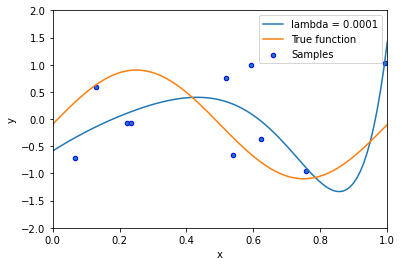

Training error:
0.5088442923507971

Testing error:
0.8574507812952259


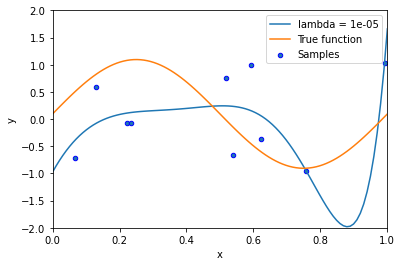

In [12]:
alphas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

ridge_train_errors = []
ridge_test_errors = []
i = 0

polynomial_features = PolynomialFeatures(degree=9)
linear_regression = LinearRegression()

pipeline.fit(X_train.reshape(-1, 1), Y_train)

for l in alphas:
    ridge = Ridge(alpha=l)
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("ridge", ridge)])

    pipeline.fit(X_train.reshape(-1, 1), Y_train)

    X_new = np.linspace(0, 1, 100)
    
    plt.plot(X_new, pipeline.predict(X_new.reshape(-1, 1)), label="lambda = " + str(l))
    plt.plot(X_data, generate(X_data), label="True function")
    plt.scatter(X_train, Y_train, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    
    print("Training error:")
    print(np.sqrt(mean_squared_error(Y_train, pipeline.predict(X_train.reshape(-1,1)))))
    print("\nTesting error:")
    print(np.sqrt(mean_squared_error(Y_test, pipeline.predict(X_test.reshape(-1,1)))))

    plt.show()
   
    ridge_train_errors.append(np.sqrt(mean_squared_error(Y_train, pipeline.predict(X_train.reshape(-1,1)))))
    ridge_test_errors.append(np.sqrt(mean_squared_error(Y_test, pipeline.predict(X_test.reshape(-1,1)))))


# Draw Test and Train Error According to Lambda

This graph further illustrates that the smallest values of lambda - for test data - acheives the most errors. The largest value has error that approaches that of the train data, although the best model is typically 0.1 or 0.01. 

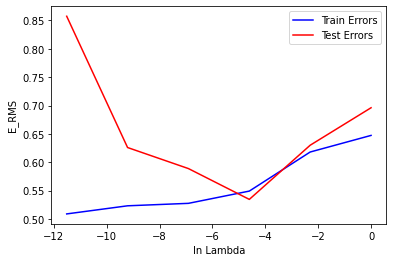

In [13]:
lambdas = [np.log(1), np.log(1/10), np.log(1/100), np.log(1/1000), np.log(1/10000), np.log(1/100000)]
plt.plot(lambdas, ridge_train_errors, color='b', label="Train Errors")
plt.plot(lambdas, ridge_test_errors, color='r', label="Test Errors")
plt.xlabel("ln Lambda")
plt.ylabel("E_RMS")
plt.legend(loc="best")
plt.show()

# Contributions and Challenges

Many references and documenations that were found did not have accumulated data on how different methodologies worked, and much of the learning was done through experimentation using Pipeline. A contribution over all references is showing how Pipeline can be used with a Ridge Regularization model (L2 regularization) to fit and train the data, to reduce overfitting caused by the linear regression. Most documentation on L2/Ridge Regularization does not use Pipeline, rather, they transform the model manually, when this can all be done with Pipeline, even though it only saves a few lines of code. This was also utlimately the biggest challenge, converting the different references on simple linear regression, to using pipeline with polynomial features and linear regression.
By using L2/Ridge regularization, this can help prevent overfitting. 

### Overfitting
Overfitting happens when a model has good performance on training data, but poor performance on other data, such as the test data or unseen data. Overfitting can occur on models trained with too much data, and it learns from the outliers. A few ways that can help reduce this would be to reduce the model's complexity or add regularization, in this case, ridge regularization.

### Underfitting
Underfitting occurs when the model has poor performance all around. Underfitting causes the model to have extremely low accuracy, and can happen on small training sets or non-linear data. To reduce underfitting, the model's complexity and number of features may be increased.


# References
Getting coefficients/Weights: https://stackoverflow.com/questions/26951880/scikit-learn-linear-regression-how-to-get-coefficients-respective-features

Polynomial Fitting: https://stackoverflow.com/questions/18767523/fitting-data-with-numpy

Polynomial Features: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

Loss Function (Root Mean Squared Error): https://medium.com/analytics-vidhya/loss-function-for-regression-problem-in-machine-learning-python-implementation-using-numpy-and-81ba30440743

Multiple Linear Regression/Polynomial Features: https://realpython.com/linear-regression-in-python/#multiple-linear-regression

Ridge Regression: https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/